In [42]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
# use later to loop through only csv files in /joined_dataframe
# # giving directory name
# dirname = 'D:\\AllData'
 
# # giving file extension
# ext = ('.exe', 'jpg')
 
# # iterating over all files
# for files in os.listdir(dirname):
#     if files.endswith(ext):
#         print(files)  # printing file name of desired extension
#     else:
#         continue

In [8]:
df = pd.read_csv('data/joined_dataframe/part-00000-ca34a9e6-1d95-49b0-80cb-610bf5b3e960-c000.csv')

# convert t_dat to datetime
df['t_dat'] = pd.to_datetime(df['t_dat'])

# ideas

demand for different colors as a function of date/season
    demand ~= volume of sales?

demand ~= volume of sales at each price point (per article/group/etc type)

see how demand changes with covariate pairs

overall demand = total sales
likelihood to buy = percent of total sales

demand by (x-values):
    age
    price

y-values:
    

In [85]:
# count purchased items grouped by month and colour group
a = df.groupby([df['t_dat'].dt.month, 'colour_group_name_black']).count()
a

article_id  customer_id  t_dat  price  \
t_dat colour_group_name_black                                          
1     0.0                             248          248    248    248   
      1.0                             824          824    824    824   
2     0.0                             225          225    225    225   
      1.0                             850          850    850    850   
3     0.0                             259          259    259    259   
      1.0                             646          646    646    646   
4     0.0                             337          337    337    337   
      1.0                             481          481    481    481   
5     0.0                             458          458    458    458   
      1.0                             514          514    514    514   
6     0.0                             444          444    444    444   
      1.0                             331          331    331    331   
7     0.0                             344          344    344    344   
      1.0                             348          348    348    348   
8     0.0                             195          195    195    195   
      1.0                             407          407    407    407   
9     0.0                             275          275    275    275   
      1.0                             985          985    985    985   
10    0.0                             267          267    267    267   
      1.0                            1270         1270   1270   1270   
11    0.0                             215          215    215    215   
      1.0                            1330         1330   1330   1330   
12    0.0                             210          210    210    210   
      1.0                            1448         1448   1448   1448   

                               sales_channel_id  club_member_status_active  \
t_dat colour_group_name_black                                                
1     0.0                                   248                        248   
      1.0                                   824                        824   
2     0.0                                   225                        225   
      1.0                                   850                        850   
3     0.0                                   259                        259   
      1.0                                   646                        646   
4     0.0                                   337                        337   
      1.0                                   481                        481   
5     0.0                                   458                        458   
      1.0                                   514                        514   
6     0.0                                   444                        444   
      1.0                                   331                        331   
7     0.0                                   344                        344   
      1.0                                   348                        348   
8     0.0                                   195                        195   
      1.0                                   407                        407   
9     0.0                                   275                        275   
      1.0                                   985                        985   
10    0.0                                   267                        267   
      1.0                                  1270                       1270   
11    0.0                                   215                        215   
      1.0                                  1330                       1330   
12    0.0                                   210                        210   
      1.0                                  1448                       1448   

                               club_member_status_left_club  \
t_dat colour_group_name_black                                 
1  

In [93]:
# total sales volume by month
a['price'].groupby(level=[0]).sum()

t_dat
1     1072
2     1075
3      905
4      818
5      972
6      775
7      692
8      602
9     1260
10    1537
11    1545
12    1658
Name: price, dtype: int64

In [94]:
# filter by condition
a['price'].loc[a.index.get_level_values('colour_group_name_black') == 1]

t_dat  colour_group_name_black
1      1.0                         824
2      1.0                         850
3      1.0                         646
4      1.0                         481
5      1.0                         514
6      1.0                         331
7      1.0                         348
8      1.0                         407
9      1.0                         985
10     1.0                        1270
11     1.0                        1330
12     1.0                        1448
Name: price, dtype: int64

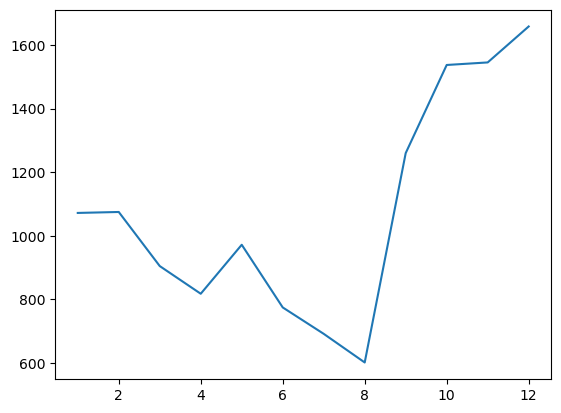

In [101]:
plt.plot(a['price'].groupby(level=[0]).sum())

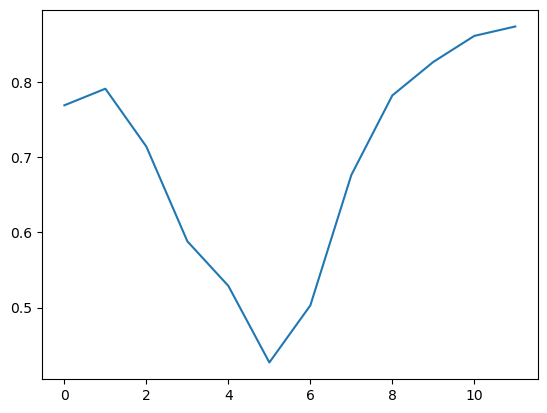

In [100]:
# percent of total sales
pcts = (a['price'].loc[a.index.get_level_values('colour_group_name_black') == 1]) / a['price'].groupby(level=[0]).sum()
plt.plot(pcts.values)

In [17]:
df.columns

Index(['article_id', 'customer_id', 't_dat', 'price', 'sales_channel_id',
       'club_member_status_active', 'club_member_status_left_club',
       'club_member_status_precreate', 'club_member_status_nan',
       'fashion_news_frequency_monthly', 'fashion_news_frequency_regularly',
       'fashion_news_frequency_nan', 'age', 'postal_code',
       'product_group_name_accessories',
       'product_group_name_garment_lower_body',
       'product_group_name_garment_upper_body', 'product_group_name_items',
       'product_group_name_nightwear', 'product_group_name_socks_tights',
       'product_group_name_underwear', 'product_group_name_unknown',
       'graphical_appearance_name_all_over_pattern',
       'graphical_appearance_name_application_3d',
       'graphical_appearance_name_colour_blocking',
       'graphical_appearance_name_denim', 'graphical_appearance_name_dot',
       'graphical_appearance_name_melange',
       'graphical_appearance_name_metallic', 'graphical_appearance_name_so

In [106]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12906    False
12907    False
12908    False
12909    False
12910    False
Length: 12911, dtype: bool